# Creating a Cutout with ECMWF ensemble forecast

In this example we download ECMWF ensemble forecast **open-data** for a cutout we want to create.

This only works if you have in before

* Installed the ECMWF `ecmwf-opendata` package
* Documentation on how to use `ecmwf-opendata` to download data [on their website here](https://github.com/ecmwf/ecmwf-opendata)

Import the package first:

In [1]:
import atlite

import logging

logging.basicConfig(level=logging.INFO)

Suppose we want to predict the weather features 10 days later from now.

And the ECMWCF IFS cycle we use in the 0z cycle.

In [2]:
import pandas as pd

init_time = pd.Timestamp.now().normalize()
lead_time = pd.Timedelta("10D")
valid_time = init_time + lead_time
cycle = 0

In [3]:
cutout = atlite.Cutout(
    path=f"test-europe-{init_time.strftime('%Y%m%d')}T{cycle}-{valid_time.strftime('%Y%m%d')}.nc",
    module="ifs_ens",
    x=slice(-13.6913, 1.7712),
    y=slice(49.9096, 60.8479),
    time=valid_time.strftime("%Y-%m-%d"), # the valid date of the forecast
    init_time=init_time.strftime("%Y-%m-%d"), # the initial date of the forecast
    cycle=cycle,
)

INFO:atlite.cutout:Building new cutout test-europe-20250929T0-20251009.nc


In [4]:
cutout.prepare()

INFO:atlite.data:Storing temporary files in /tmp/tmpbao0p9xe
INFO:atlite.data:Calculating and writing with module ifs_ens:
INFO:atlite.datasets.ifs_ens:Requesting data for feature temperature...
INFO:atlite.datasets.ifs_ens:Requesting data for feature height...
INFO:atlite.datasets.ifs_ens:ECMWF Open-data: Downloading variables
	2t (ForecastAt: 2025-09-29T0z, Step: 240h)
	2d (ForecastAt: 2025-09-29T0z, Step: 240h)

INFO:atlite.datasets.ifs_ens:Requesting data for feature runoff...
INFO:atlite.datasets.ifs_ens:Requesting data for feature influx...
INFO:atlite.datasets.ifs_ens:Requesting data for feature wind...
INFO:multiurl.base:Downloading https://data.ecmwf.int/forecasts/20250929/00z/ifs/0p25/enfo/20250929000000-240h-enfo-ef.grib2
INFO:atlite.datasets.ifs_ens:ECMWF Open-data: Downloading variables                    
	z (ForecastAt: 2025-09-29T0z, Step: 0h)



By downloading data from the ECMWF open data dataset, you agree to the terms: Attribution 4.0 International (CC BY 4.0). Please attribute ECMWF when downloading this data.


INFO:multiurl.base:Downloading https://data.ecmwf.int/forecasts/20250929/00z/ifs/0p25/oper/20250929000000-0h-oper-fc.grib2
INFO:atlite.datasets.ifs_ens:ECMWF Open-data: Downloading variables                
	ro (ForecastAt: 2025-09-29T0z, Step: 240h)

INFO:multiurl.base:Downloading https://data.ecmwf.int/forecasts/20250929/00z/ifs/0p25/enfo/20250929000000-240h-enfo-ef.grib2
INFO:atlite.datasets.ifs_ens:ECMWF Open-data: Downloading variables                    
	ssrd (ForecastAt: 2025-09-29T0z, Step: 240h)
	ssr (ForecastAt: 2025-09-29T0z, Step: 240h)

INFO:multiurl.base:Downloading https://data.ecmwf.int/forecasts/20250929/00z/ifs/0p25/enfo/20250929000000-240h-enfo-ef.grib2
INFO:atlite.datasets.ifs_ens:ECMWF Open-data: Downloading variables                   
	10u (ForecastAt: 2025-09-29T0z, Step: 240h)
	10v (ForecastAt: 2025-09-29T0z, Step: 240h)
	100u (ForecastAt: 2025-09-29T0z, Step: 240h)
	100v (ForecastAt: 2025-09-29T0z, Step: 240h)

INFO:multiurl.base:Downloading https://data.ecmw

<Cutout "test-europe-20250929T0-20251009">
 x = -13.50 ⟷ 1.75, dx = 0.25
 y = 50.00 ⟷ 60.75, dy = 0.25
 time = 2025-10-09 ⟷ 2025-10-09, dt = h
 module = ifs_ens
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

In [5]:
cutout.data

<xarray.Dataset> Size: 131MB
Dimensions:               (y: 44, x: 62, number: 50, time: 24)
Coordinates:
  * x                     (x) float64 496B -13.5 -13.25 -13.0 ... 1.25 1.5 1.75
  * y                     (y) float64 352B 50.0 50.25 50.5 ... 60.25 60.5 60.75
  * time                  (time) datetime64[ns] 192B 2025-10-09 ... 2025-10-0...
    lon                   (x) float64 496B dask.array<chunksize=(62,), meta=np.ndarray>
    lat                   (y) float64 352B dask.array<chunksize=(44,), meta=np.ndarray>
  * number                (number) int64 400B 1 2 3 4 5 6 ... 45 46 47 48 49 50
Data variables:
    height                (y, x) float32 11kB dask.array<chunksize=(44, 62), meta=np.ndarray>
    wnd100m               (number, time, y, x) float32 13MB dask.array<chunksize=(50, 24, 44, 62), meta=np.ndarray>
    wnd_shear_exp         (number, time, y, x) float64 26MB dask.array<chunksize=(50, 24, 44, 62), meta=np.ndarray>
    wnd_azimuth           (number, time, y, x) float32 13MB dask.array<chunksize=(50, 24, 44, 62), meta=np.ndarray>
    ssrd                  (number, time, y, x) float32 13MB dask.array<chunksize=(50, 24, 44, 62), meta=np.ndarray>
    albedo                (number, time, y, x) float32 13MB dask.array<chunksize=(50, 24, 44, 62), meta=np.ndarray>
    temperature           (number, time, y, x) float32 13MB dask.array<chunksize=(50, 24, 44, 62), meta=np.ndarray>
    soil temperature      (number, time, y, x) float32 13MB dask.array<chunksize=(50, 24, 44, 62), meta=np.ndarray>
    dewpoint temperature  (number, time, y, x) float32 13MB dask.array<chunksize=(50, 24, 44, 62), meta=np.ndarray>
    runoff                (number, time, y, x) float32 13MB dask.array<chunksize=(50, 24, 44, 62), meta=np.ndarray>
Attributes:
    module:                  ifs_ens
    prepared_features:       ['influx', 'temperature', 'wind', 'runoff', 'hei...
    chunksize_time:          100
    init_time:               2025-09-29
    cycle:                   0
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-29T20:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
cutout.prepared_features

module   feature    
ifs_ens  height                       height
         wind                        wnd100m
         wind                  wnd_shear_exp
         wind                    wnd_azimuth
         influx                         ssrd
         influx                       albedo
         temperature             temperature
         temperature        soil temperature
         temperature    dewpoint temperature
         runoff                       runoff
dtype: object

# Fill missing values

Note that IFS' prediciton is not availble for all time step.

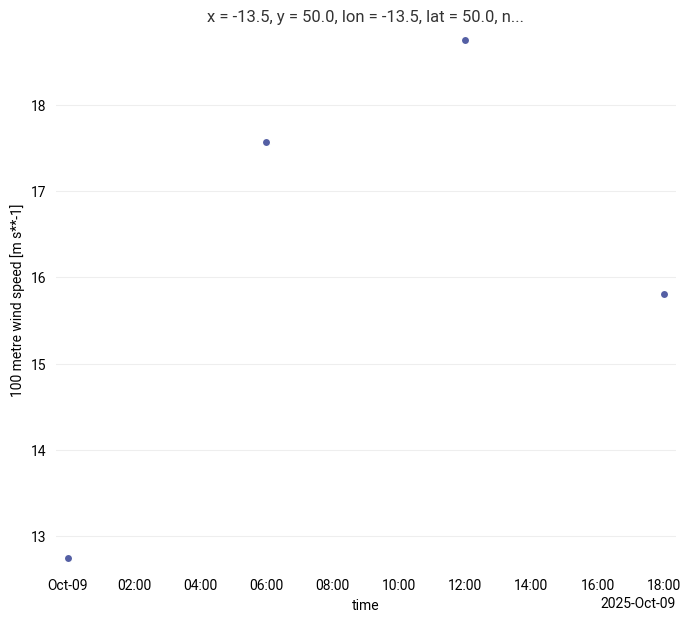

In [23]:
cutout.data.isel(x=0, y=0, number=30)['wnd100m'].plot.scatter(x='time', y='wnd100m')

We can interpolate the missing values along the `time` dimension

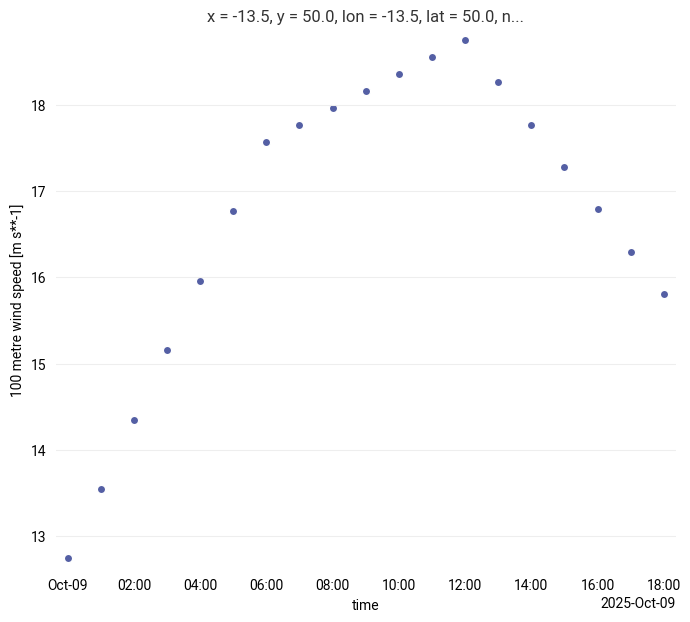

In [27]:
cutout.data.isel(x=0, y=0, number=30)['wnd100m'].interpolate_na(dim='time', method='linear').plot.scatter(x='time', y='wnd100m')